In [4]:
# -*- coding: utf-8 -*-


import csv
import os
import matplotlib.pyplot as plt
import re
import random
import numpy as np
import sqlite3 as db

######part1 从数据库中读取数据


def readFronSqllite(db_path,exectCmd):
    conn = db.connect(db_path)  # 该 API 打开一个到 SQLite 数据库文件 database 的链接，如果数据库成功打开，则返回一个连接对象
    cursor=conn.cursor()        # 该例程创建一个 cursor，将在 Python 数据库编程中用到。
    conn.row_factory=db.Row     # 可访问列信息
    cursor.execute(exectCmd)    #该例程执行一个 SQL 语句
    rows=cursor.fetchall()      #该例程获取查询结果集中所有（剩余）的行，返回一个列表。当没有可用的行时，则返回一个空的列表。
    return rows

def readfromAppaFrame(ARPAFrame):
    subARPA=ARPAFrame.split(',')
    return subARPA

def get_dataset(path='./db.sqlite3'):
    dataset = []
    for provinceID in [i + 1 for i in range(34)]:
        for year in [i + 2017 for i in range(3)]:
            for categoryID in range(1,4):
                sql = 'select score,rank from Rankings where provinceID_id=%s and year=%s and categoryID_id=%s' % (provinceID, year,categoryID)
                rows = readFronSqllite(path, sql)
                data = []
                data.append((provinceID, year,categoryID))
                for row in rows:
                    data.append(list(row))
                for i in range(len(data) - 2):
                    data[-(1 + i)][-1] = data[-(1 + i)][-1] - data[-(2 + i)][-1]
                dataset.append(data)
    return dataset


def distance(x, y): #求距离
    return abs(x-y)

def Clustering(data, k):
    #data:分数列表[[分数1， 人数1],...,[分数n， 人数n]] ， k：超参量，簇的数目
    cluster = [] #创建簇中心集合的数组
    belong = []  #记录每一个分数隶属于哪一个中心
    for _ in range(k): #按照k值在cluster中创建代表簇中心数
        cluster.append(data[random.randint(0, len(data)-1)][0])
    for _ in range(len(data)):
        belong.append(-1)  #定义初始值-1表示尚未归属
    while True:
        change = False #标志簇中心是否发生变化
        for index, d in enumerate(data):
            dis = []  #距离列表
            for c in cluster:
                dis.append( distance(d[0], c) )
            if belong[index] != dis.index(min(dis)):
                change = True
                belong[index] = dis.index(min(dis))
        if change == False:
            break
        for index, c in enumerate(cluster):
            sum = 0
            num = 0
            for i, b in enumerate(belong):
                if index == b:
                    sum = sum + (data[i][0] * data[i][1])
                    num = num + data[i][1]
            if num == 0:
                c = 0
            else:
                c = sum/num
                cluster[index] = c
    return cluster,belong

def criterion(data, cluster, belong):
    #data::分数列表[[分数1， 人数1],...,[分数n， 人数n]]
    #cluster:聚类中心数组，长度为k
    #belong:分数隶属中心列表
    k = len(cluster)  # 获取聚类数
    WSS = 0  # WSS:Within cluster sum of squares,表示各个点到cluster中心距离的绝对值,代表误差
    for i in range(0,k):
        for index, b in enumerate(belong):
            if b == i:
                WSS += distance(cluster[i], data[index][0])
    return WSS;




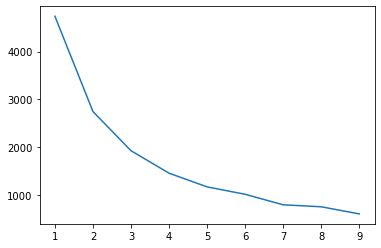

分数列表： [411, 410, 409, 408, 407, 406, 405, 404, 403, 402, 401, 400, 399, 398, 397, 396, 395, 394, 393, 392, 391, 390, 389, 388, 387, 386, 385, 384, 383, 382, 381, 380, 379, 378, 377, 376, 375, 374, 373, 372, 371, 370, 369, 368, 367, 366, 365, 364, 363, 362, 361, 360, 359, 358, 357, 356, 355, 354, 353, 352, 351, 350, 349, 348, 347, 346, 345, 344, 343, 342, 341, 340, 339, 338, 337, 336, 335, 334, 333, 332, 331, 330, 329, 328, 327, 326, 325, 324, 323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310, 309, 308, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 290, 289, 288, 287, 286, 285, 284, 283, 282, 281, 280, 279, 278, 277, 276, 275]
([357.0664590635954, 315.0380747571013], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0, flags=flags)


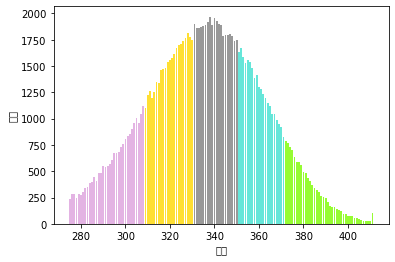

In [5]:

dataset = get_dataset()
testdata=[]
for item in dataset:
    if(item[0]==(4,2018,2)):
        for items in item:
            testdata.append(items)
testdata.remove((4,2018,2))

#获取最佳聚类数
maxk = 9 #所测试的最大聚类数
WSSarray = []  # 对聚类数为1,2,...maxk，分别存储其误差值，WSSarray的长度为maxk
for i in range(1,maxk+1):
    cluster, belong = Clustering(testdata, i)
    WSS = criterion(testdata,cluster,belong)
    WSSarray.append(WSS)
# print("不同聚类数对应的误差值所组成的数组为:",WSS)  # 输出误差数组

WSSDelta = list(np.ones(maxk))  # 获得误差数组的增量差，选择增量差最大的点对应的聚类数作为合适的聚类数
WSSDelta[0] = 0
maxDelta = -1
indexDelta = 0
for i in range(1,maxk):
    WSSDelta[i] = WSSarray[i-1] - WSSarray[i]
    if WSSDelta[i]>maxDelta:
        maxDelta = WSSDelta[i]
        indexDelta = i+1  # 较好的聚类数
# print("最大的误差差值为:",maxDelta)  # 输出最大误差
# print("误差差值对应的数组为:",SSEDelta)  # 输出误差差值
#print(WSSDelta)
#print("最佳聚类数为:",indexDelta)#输出最佳聚类数

x = list(range(1,maxk+1))
plt.figure()
plt.plot(x, WSSarray)
plt.show()


###此处选取最佳聚类数有两点需要改进或者思考：（1）距离度量的范数（2）拐点的确定
#根据差值，最大拐点往往是k=2，但是从图示可以看出，k=5也可以作为一个较好的拐点进行聚类


x = [d[0] for d in testdata]
y = [d[1] for d in testdata]

###
print('分数列表：',x)

belong1 = Clustering(testdata,2)
print(belong1)

belong2 = Clustering(testdata,5)
print(belong2)


colorlist=[]
for items in belong2[1]:
    if(items==0):
        colorlist.append('grey')
    if(items==1):
        colorlist.append('gold')
    if(items==2):
        colorlist.append('turquoise')
    if(items==3):
        colorlist.append('plum')
    if(items==4):
        colorlist.append('lawngreen')

plt.figure()
plt.xlabel('分数')
plt.ylabel('人数')
plt.bar(x, y, color=colorlist, alpha=0.8)
plt.show()

#最后print出聚类边界和每一个分数的标签，并画出一个分段聚类彩色图(以k=5为例)
#2020.9.18

In [6]:

def get_dic(path='./db.sqlite3'):
    sql = 'select * from Provinces'
    rows = readFronSqllite(path, sql)
    Dic = {}
    for row in rows:
        Dic[row[0]]=row[1]
    return Dic

def get_college_name(path='./db.sqlite3'):
    sql = 'select collegeID,collegeName from Colleges'
    rows = readFronSqllite(path, sql)
    Dic = {}
    for row in rows:
        Dic[row[0]]=row[1]
    return Dic

def clusterFromData(dataset):
    clusterList = []
    for data in dataset:
        if len(data)>5:  # 剔除不合规则的数据
            pointdata = data[1:]
            clusterCenter,belong = Clustering(pointdata, 5)
            clusterCenter.sort()
            clusterCenter.append(data[0])  # 加入标签
            for i in range(5,0,-1):
                clusterCenter[i] = clusterCenter[i-1]
            clusterCenter[0] = data[0]
            clusterList.append(clusterCenter)
    return clusterList



rows = readFronSqllite('./db.sqlite3', 'select provinceID_id,categoryID_id,collegeID_id,avg(minScore) from Majors group by provinceID_id,collegeID_id,categoryID_id')
College_dataset = []
for row in rows:
    College_dataset.append(list(row))
Dic = get_college_name(path='./db.sqlite3')
for d in College_dataset:
    d[2] = Dic.get(d[2])

Score_dataset = get_dataset()

rows = readFronSqllite('./db.sqlite3', 'select provinceID_id,collegeID_id,categoryID_id,year,majorName,minScore  from Majors')
Major_dataset = []
for row in rows:
    Major_dataset.append(list(row))

for item in Score_dataset:
    print(item)
print(Score_dataset)#分段聚类输入数据（功能1）
#print(College_dataset)#大学推荐输入数据（功能1延展）
#print(Major_dataset)#学校专业评级输入数据（功能2）

#Score_dataset形式：[  [ (provinceID,year，categoryID),[分数，人数], [分数，人数]...,[分数，人数] ] , [], []   ]
#College_dataset:[[1, 1, '北京大学', 653.6666666666666],
'''
 [1, 2, '北京大学', 681.0],
 [1, 1, '中国人民大学', 635.0704225352113],
 [1, 2, '中国人民大学', 654.8169014084507],
 [1, 1, '清华大学', 654.6666666666666],
 [1, 2, '清华大学', 675.8333333333334],
 [1, 1, '北京交通大学', 616.0],
 [1, 2, '北京交通大学', 616.25],
 [1, 1, '北京航空航天大学', 629.5],
'''
#Major_dataset:省份编号，大学编号，科目，年份，专业名称，分数


[(1, 2017, 1), [670, 2], [669, 2], [668, 0], [667, 1], [666, 1], [665, 2], [664, 0], [663, 1], [662, 1], [661, 0], [660, 0], [659, 0], [658, 1], [657, 1], [656, 2], [655, 4], [654, 3], [653, 4], [652, 1], [651, 3], [650, 2], [649, 3], [648, 2], [647, 8], [646, 1], [645, 4], [644, 6], [643, 5], [642, 4], [641, 4], [640, 8], [639, 9], [638, 8], [637, 10], [636, 7], [635, 5], [634, 14], [633, 17], [632, 15], [631, 16], [630, 14], [629, 22], [628, 21], [627, 26], [626, 21], [625, 18], [624, 35], [623, 25], [622, 26], [621, 22], [620, 35], [619, 22], [618, 30], [617, 33], [616, 35], [615, 39], [614, 31], [613, 46], [612, 43], [611, 47], [610, 39], [609, 62], [608, 42], [607, 59], [606, 59], [605, 49], [604, 56], [603, 49], [602, 53], [601, 61], [600, 66], [599, 65], [598, 67], [597, 74], [596, 94], [595, 77], [594, 79], [593, 80], [592, 92], [591, 79], [590, 104], [589, -2097], [588, 1], [587, 1], [586, 1], [585, 1], [584, 1], [583, 1], [582, 1], [581, 1], [580, 1], [579, 1], [578, 1], [577

"\n [1, 2, '北京大学', 681.0],\n [1, 1, '中国人民大学', 635.0704225352113],\n [1, 2, '中国人民大学', 654.8169014084507],\n [1, 1, '清华大学', 654.6666666666666],\n [1, 2, '清华大学', 675.8333333333334],\n [1, 1, '北京交通大学', 616.0],\n [1, 2, '北京交通大学', 616.25],\n [1, 1, '北京航空航天大学', 629.5],\n"

2019年数据缺失


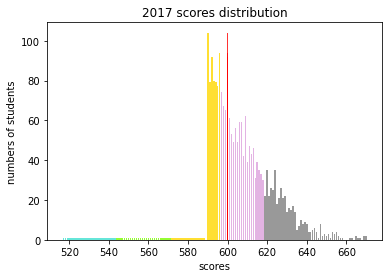

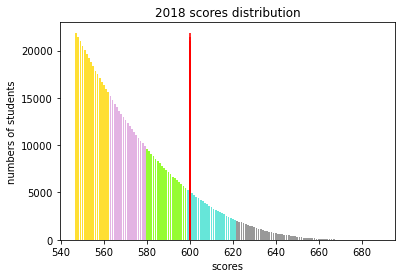

In [59]:

###app1:根据用户输入的信息，显示三年的分段图和他所处的位置情况
###延申：根据此分段显示当年他在哪个分段，同时根据分段推荐大学

user=[1,1,600]#省id,,理科1文科2综合3,分
userid='000'
#（2，2017，1）（2，2018，1）（2，2019，1）

dataset = get_dataset()
testdata=[]
for item in dataset:
    if(item[0]==(user[0],2017,user[1])):
        for items in item:
            testdata.append(items)
testdata.remove((user[0],2017,user[1]))

######判断此年数据是否缺失(是否为空表)
if len(testdata)==0:
    a=0
else:
    a=1

x = [d[0] for d in testdata]
y = [d[1] for d in testdata]

######去除数据中的负数人数以及对应的分数
for items in y:
    if(items<0):
        num=y.index(items)
        del x[num]
        del y[num]



dataset1 = get_dataset()
testdata1=[]
for item in dataset1:
    if(item[0]==(user[0],2018,user[1])):
        for items in item:
            testdata1.append(items)
testdata1.remove((user[0],2018,user[1]))

######判断数据缺失
if len(testdata1)==0:
    b=0
else:
    b=1

x1 = [d[0] for d in testdata1]
y1 = [d[1] for d in testdata1]

######去除数据中的负数人数以及对应的分数
for items in y1:
    if(items<0):
        num=y1.index(items)
        del x1[num]
        del y1[num]



dataset2 = get_dataset()
testdata2=[]
for item in dataset2:
    if(item[0]==(user[0],2019,user[1])):
        for items in item:
            testdata2.append(items)
testdata2.remove((user[0],2019,user[1]))

######判断数据缺失
if len(testdata2)==0:
    c=0
else:
    c=1

x2 = [d[0] for d in testdata2]
y2 = [d[1] for d in testdata2]

######去除数据中的负数人数以及对应的分数
for items in y2:
    if(items<0):
        num=y2.index(items)
        del x2[num]
        del y2[num]


if a==1:
    belong = Clustering(testdata,5)
    colorlist=[]
    for items in belong[1]:
        if(items==0):
            colorlist.append('grey')
        if(items==1):
            colorlist.append('gold')
        if(items==2):
            colorlist.append('turquoise')
        if(items==3):
            colorlist.append('plum')
        if(items==4):
            colorlist.append('lawngreen')
else:
    print("2017年数据缺失")

if b==1:
    belong1 = Clustering(testdata1,5)
    colorlist1=[]
    for items in belong1[1]:
        if(items==0):
            colorlist1.append('grey')
        if(items==1):
            colorlist1.append('gold')
        if(items==2):
            colorlist1.append('turquoise')
        if(items==3):
            colorlist1.append('plum')
        if(items==4):
            colorlist1.append('lawngreen')
else:
    print("2018年数据缺失")

    
if c==1:
    belong2 = Clustering(testdata2,5)
    colorlist2=[]
    for items in belong2[1]:
        if(items==0):
            colorlist2.append('grey')
        if(items==1):
            colorlist2.append('gold')
        if(items==2):
            colorlist2.append('turquoise')
        if(items==3):
            colorlist2.append('plum')
        if(items==4):
            colorlist2.append('lawngreen')
else:
    print("2019年数据缺失")


if a==1:
    plt.figure()
    plt.title('2017 scores distribution')
    plt.xlabel('scores')
    plt.ylabel('numbers of students')
    plt.bar(x, y, color=colorlist, alpha=0.8)
    plt.bar(user[2],y,color='red',alpha=0.8)
    picid=userid+'_pic1.jpg'
    plt.savefig(picid)

if b==1:
    plt.figure()
    plt.title('2018 scores distribution')
    plt.xlabel('scores')
    plt.ylabel('numbers of students')
    plt.bar(x1, y1, color=colorlist1, alpha=0.8)
    plt.bar(user[2],y1,color='red',alpha=0.8)
    picid=userid+'_pic2.jpg'
    plt.savefig(picid)

if c==1:
    plt.figure()
    plt.title('2019 scores distribution')
    plt.xlabel('scores')
    plt.ylabel('numbers of students')
    plt.bar(x2, y2, color=colorlist2, alpha=0.8)
    plt.bar(user[2],y2,color='red',alpha=0.8)
    picid=userid+'_pic3.jpg'
    plt.savefig(picid)
#最后print出聚类边界和每一个分数的标签，并画出一个分段聚类彩色图
#2020.9.24


###下面进行学校推荐